# Identify Fraud from Enron Email
#### Matthew Miller 
#### April 4, 2017

## Project Overview

In 2000, Enron was one of the largest companies in the United States. By 2002, it had collapsed into bankruptcy due to widespread corporate fraud. In the resulting Federal investigation, a significant amount of typically confidential information entered into the public record, including tens of thousands of emails and detailed financial data for top executives. In this project, I will build a person of interest identifier based on financial and email data made public as a result of the Enron scandal. The data used has been combined with a hand-generated list of persons of interest in the fraud case, which means individuals who were indicted, reached a settlement or plea deal with the government, or testified in exchange for prosecution immunity. ([Citation](https://classroom.udacity.com/nanodegrees/nd002/parts/0021345409/modules/317428862475461/lessons/3174288624239847/concepts/31803986370923))

## Data Exploration and Outlier Investigation

To begin my investigation, I am going to explore the data to get a feel for the information available.

### Data Exploration

In [3]:
# %load ../ud120-projects-master/datasets_questions/explore_enron_data.py
#!/home/matthew/anaconda2/bin/python

""" 
    Starter code for exploring the Enron dataset (emails + finances);
    loads up the dataset (pickled dict of dicts).

    The dataset has the form:
    enron_data["LASTNAME FIRSTNAME MIDDLEINITIAL"] = { features_dict }

    {features_dict} is a dictionary of features associated with that person.
    You should explore features_dict as part of the mini-project,
    but here's an example to get you started:

    enron_data["SKILLING JEFFREY K"]["bonus"] = 5600000
    
"""

import pickle

enron_data = pickle.load(open("../final_project/final_project_dataset.pkl", "r"))

print "Size Of The Enron Dataset:", len(enron_data), "people"

print "People in the Enron Dataset:", [name for name in enron_data.keys()]

Size Of The Enron Dataset: 146 people
People in the Enron Dataset: ['METTS MARK', 'BAXTER JOHN C', 'ELLIOTT STEVEN', 'CORDES WILLIAM R', 'HANNON KEVIN P', 'MORDAUNT KRISTINA M', 'MEYER ROCKFORD G', 'MCMAHON JEFFREY', 'HORTON STANLEY C', 'PIPER GREGORY F', 'HUMPHREY GENE E', 'UMANOFF ADAM S', 'BLACHMAN JEREMY M', 'SUNDE MARTIN', 'GIBBS DANA R', 'LOWRY CHARLES P', 'COLWELL WESLEY', 'MULLER MARK S', 'JACKSON CHARLENE R', 'WESTFAHL RICHARD K', 'WALTERS GARETH W', 'WALLS JR ROBERT H', 'KITCHEN LOUISE', 'CHAN RONNIE', 'BELFER ROBERT', 'SHANKMAN JEFFREY A', 'WODRASKA JOHN', 'BERGSIEKER RICHARD P', 'URQUHART JOHN A', 'BIBI PHILIPPE A', 'RIEKER PAULA H', 'WHALEY DAVID A', 'BECK SALLY W', 'HAUG DAVID L', 'ECHOLS JOHN B', 'MENDELSOHN JOHN', 'HICKERSON GARY J', 'CLINE KENNETH W', 'LEWIS RICHARD', 'HAYES ROBERT E', 'MCCARTY DANNY J', 'KOPPER MICHAEL J', 'LEFF DANIEL P', 'LAVORATO JOHN J', 'BERBERIAN DAVID', 'DETMERING TIMOTHY J', 'WAKEHAM JOHN', 'POWERS WILLIAM', 'GOLD JOSEPH', 'BANNANTINE JAMES M'

In [4]:
# Features In The Enron Dataset
    
print "Number of Features in the Enron Dataset:", len(enron_data.values()[0])

print "Features in the Enron Dataset:", [value for value in enron_data.values()[0]]

Number of Features in the Enron Dataset: 21
Features in the Enron Dataset: ['salary', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'loan_advances', 'from_messages', 'other', 'from_this_person_to_poi', 'poi', 'director_fees', 'deferred_income', 'long_term_incentive', 'email_address', 'from_poi_to_this_person']


In [5]:
# Finding POIs In The Enron Data

poi_list = []
for name in enron_data.keys(): 
    if enron_data[name]["poi"] == 1:
        poi_list.append(name)
print "Number of POIs In The Enron Data:", len(poi_list)

POIs = [name for name in enron_data.keys() if enron_data[name]["poi"] == 1]

print "POI List:", POIs

Number of POIs In The Enron Data: 18
POI List: ['HANNON KEVIN P', 'COLWELL WESLEY', 'RIEKER PAULA H', 'KOPPER MICHAEL J', 'SHELBY REX', 'DELAINEY DAVID W', 'LAY KENNETH L', 'BOWEN JR RAYMOND M', 'BELDEN TIMOTHY N', 'FASTOW ANDREW S', 'CALGER CHRISTOPHER F', 'RICE KENNETH D', 'SKILLING JEFFREY K', 'YEAGER F SCOTT', 'HIRKO JOSEPH', 'KOENIG MARK E', 'CAUSEY RICHARD A', 'GLISAN JR BEN F']


In summary, the Enron Data set has the following characteristics:

- 146 people
    - 18 of which, or ~12%, are POIs (the POI to Non-POI ratio is very lopsided)
- 21 features

### Outlier Investigation

For my outlier investigation, I have decided to look at the features "salary and "bonus".  I will plot the data points to get a look at the distribution of the data and see if any data points pop out at me.

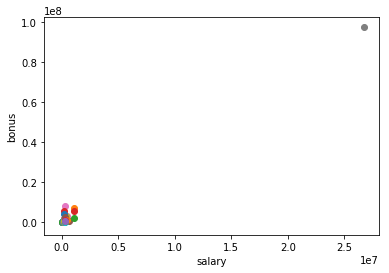

In [6]:
# %load ../ud120-projects-master/outliers/enron_outliers.py
#!/home/matthew/anaconda2/bin/python

import sys
import matplotlib.pyplot
sys.path.append("../tools")
from feature_format import featureFormat, targetFeatureSplit

# I have not included "email_address" in the features list
features_list = ['salary', 'bonus']

data = featureFormat(enron_data, features_list)

for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter(salary, bonus)

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

################################

# for point in data:
#     total_payments = point[1]
#     total_stock_value = point[4]
#     matplotlib.pyplot.scatter( total_payments, total_stock_value )

# matplotlib.pyplot.xlabel("total_payments")
# matplotlib.pyplot.ylabel("total_stock_value")
# matplotlib.pyplot.show()

# name_list2 = [name for name in data_dict.keys() if data_dict[name]["total_payments"] != 'NaN' and data_dict[name]["total_payments"] >= 100000000 and data_dict[name]["bonus"] >= 5000000]
# print name_list

There is definitely something wrong here.  Most all of the data points are clumped together at the lower left and one data point is way off by itself in the top right.  Let's find out what that point is and see about removing it.  In order to figure out what is, I will first put all the salaries in a list and then return the name of the person who has the highest salary.

In [7]:
salary_list = [enron_data[name]['salary'] for name in enron_data if type(enron_data[name]['salary']) == int]
print "Salary Outlier:", [name for name in enron_data if enron_data[name]['salary'] == max(salary_list)]

Salary Outlier: ['TOTAL']


Well, that's interesting.  It turns out the outlier was not a person at all, but instead seems to be the value for the total of all of the salaries in the data set.  That is not a data point I need, so I will remove it.  After I remove it, I will print out the plot again and check what the highest points are for bonus and salary to make sure they are legitimate data points.

In [8]:
# Popping outlier
enron_data.pop("TOTAL")

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

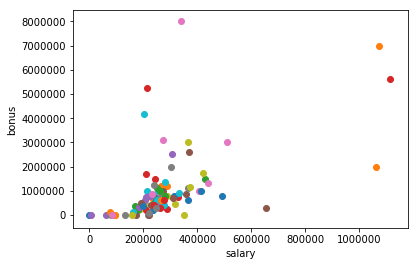

In [9]:
data = featureFormat(enron_data, features_list)

for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter(salary, bonus)

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

There, that's much better!  There are still a few features that stick out on the far end of the spectrum for both salary and bonus.  While I assume they are probably real Enron employees and legitimate data points, it's best to make sure.

In [10]:
# Print names of remaining outliers to check for legitimacy
name_list = [name for name in enron_data.keys() if enron_data[name]["salary"] != 'NaN' and 
             enron_data[name]["salary"] >= 1000000 and enron_data[name]["bonus"] >= 5000000]
print name_list

['LAY KENNETH L', 'SKILLING JEFFREY K']


As I suspected, they are indeed legitimate data points, but, looking at the other end of the spectrum, there seems to be some points that don't have any salary or bonus.  It's probably best to give those points a look as well.

In [11]:
name_list = [name for name in enron_data.keys() if enron_data[name]["salary"] == 'NaN' and 
             enron_data[name]["bonus"] == 'NaN']
print name_list

['CORDES WILLIAM R', 'MEYER ROCKFORD G', 'HORTON STANLEY C', 'GIBBS DANA R', 'LOWRY CHARLES P', 'WALTERS GARETH W', 'CHAN RONNIE', 'BELFER ROBERT', 'WODRASKA JOHN', 'URQUHART JOHN A', 'WHALEY DAVID A', 'HAUG DAVID L', 'MENDELSOHN JOHN', 'CLINE KENNETH W', 'LEWIS RICHARD', 'HAYES ROBERT E', 'MCCARTY DANNY J', 'WAKEHAM JOHN', 'POWERS WILLIAM', 'DUNCAN JOHN H', 'LEMAISTRE CHARLES', 'PIRO JIM', 'WROBEL BRUCE', 'MEYER JEROME J', 'MCDONALD REBECCA', 'SCRIMSHAW MATTHEW', 'GATHMANN WILLIAM D', 'GILLIS JOHN', 'MORAN MICHAEL P', 'FOY JOE', 'LOCKHART EUGENE E', 'PEREIRA PAULO V. FERRAZ', 'BLAKE JR. NORMAN P', 'SHERRICK JEFFREY B', 'PRENTICE JAMES', 'THE TRAVEL AGENCY IN THE PARK', 'NOLES JAMES L', 'FOWLER PEGGY', 'CHRISTODOULOU DIOMEDES', 'JAEDICKE ROBERT', 'WINOKUR JR. HERBERT S', 'BROWN MICHAEL', 'BADUM JAMES P', 'HUGHES JAMES A', 'BHATNAGAR SANJAY', 'YEAP SOON', 'HIRKO JOSEPH', 'HAYSLETT RODERICK J', 'FUGH JOHN L', 'SAVAGE FRANK', 'GRAMM WENDY L']


Well, that was more people than I expected, but while looking at the list I noticed a person named "THE TRAVEL AGENCY IN THE PARK".  This definately doesn't seem like an employee, so I did a quick Google search and found out that this was a [travel agency co-owned by Ken Lay's younger sister Sharon Lay](http://content.time.com/time/magazine/article/0,9171,198885,00.html) (it was renamed Alliance Worldwide in 2002).  According to Sharon Lay's [LinkedIn page](https://www.linkedin.com/in/sharon-lay-aa985b13/), she left the company in 2005.

Because the travel agaency is not an Enron employee, I'll get rid of it.

In [12]:
enron_data.pop("THE TRAVEL AGENCY IN THE PARK")

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 362096,
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 362096,
 'total_stock_value': 'NaN'}

Seeing how this data point had a "Nan" value for almost all it's features, it made me wonder if there are any people on the list with "Nan" values for all features.  In order to do this, I will look at everyone in the data set who is not a POI and has a "Nan" value for "total_payments" and "total_stock_value" (I chose those two because they are totals for all other financial features).

In [13]:
name_list = [name for name in enron_data.keys() if enron_data[name]["poi"] == False and 
             enron_data[name]["total_payments"] == 'NaN' and enron_data[name]["total_stock_value"] == 'NaN']
print name_list

['CHAN RONNIE', 'POWERS WILLIAM', 'LOCKHART EUGENE E']


In [14]:
[[name,enron_data[name]] for name in name_list]

[['CHAN RONNIE',
  {'bonus': 'NaN',
   'deferral_payments': 'NaN',
   'deferred_income': -98784,
   'director_fees': 98784,
   'email_address': 'NaN',
   'exercised_stock_options': 'NaN',
   'expenses': 'NaN',
   'from_messages': 'NaN',
   'from_poi_to_this_person': 'NaN',
   'from_this_person_to_poi': 'NaN',
   'loan_advances': 'NaN',
   'long_term_incentive': 'NaN',
   'other': 'NaN',
   'poi': False,
   'restricted_stock': 32460,
   'restricted_stock_deferred': -32460,
   'salary': 'NaN',
   'shared_receipt_with_poi': 'NaN',
   'to_messages': 'NaN',
   'total_payments': 'NaN',
   'total_stock_value': 'NaN'}],
 ['POWERS WILLIAM',
  {'bonus': 'NaN',
   'deferral_payments': 'NaN',
   'deferred_income': -17500,
   'director_fees': 17500,
   'email_address': 'ken.powers@enron.com',
   'exercised_stock_options': 'NaN',
   'expenses': 'NaN',
   'from_messages': 26,
   'from_poi_to_this_person': 0,
   'from_this_person_to_poi': 0,
   'loan_advances': 'NaN',
   'long_term_incentive': 'NaN',


Even though William Powers and Ronnie Chan did not recieve payments of any kind, they did have some recorded email exchanges and William Powers even has 12 shared receipts with a POI.  As a result, I will keep them.  Eugene E Lockhart, however, has "Nan" values for all the features with the exeption of the "poi" feature, so I will remove him due to a lack of informational value.

In [15]:
enron_data.pop('LOCKHART EUGENE E')

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 'NaN',
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 'NaN',
 'total_stock_value': 'NaN'}

So in summary, there were two definite outliers ("Total" and "The Travel Agency at the Park") and one judgment call outlier ("Eugene E Lockhart").  Everyone else on the list seems to be a real person with legitimate data points I will need for my model, so I will move on.

## Optimize Feature Selection/Engineering

### Create New Features

For making a new feature to test, I decided I wanted to see what percentage of someone's total emails were sent to POIs.  My reasoning is that if someone is a POI, they would likely have a higher percentage of their total emails going to other POIs than non POIs.  In order to do that, I wrote the function below to create three new variables.  Two of them ("total_emails" and "total_poi_contact") were necessary to make in order to create the "perc_poi_contact" variable that I ultimately wanted.

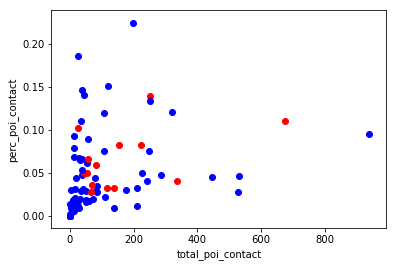

Number of Features in the Enron Dataset: 24
Features in the Enron Dataset: ['to_messages', 'deferral_payments', 'expenses', 'poi', 'perc_poi_contact', 'deferred_income', 'email_address', 'long_term_incentive', 'restricted_stock_deferred', 'shared_receipt_with_poi', 'loan_advances', 'from_messages', 'other', 'director_fees', 'bonus', 'total_stock_value', 'from_poi_to_this_person', 'total_emails', 'from_this_person_to_poi', 'restricted_stock', 'salary', 'total_payments', 'exercised_stock_options', 'total_poi_contact']


In [16]:
#!/home/matthew/anaconda2/bin/python

# Creating and plotting new features
for name in enron_data.keys():
    edn = enron_data[name]
    edn["perc_poi_contact"] = 0
    edn["total_emails"] = 0
    edn["total_poi_contact"] = 0
    if (edn["from_this_person_to_poi"] != "NaN" and edn["from_poi_to_this_person"] != "NaN"
        and edn["to_messages"] != "NaN" and edn["from_messages"] != "NaN"):
        edn["total_poi_contact"] = edn["from_this_person_to_poi"] + edn["from_poi_to_this_person"]
        edn["total_emails"] = edn["to_messages"] + edn["from_messages"]
        edn["perc_poi_contact"] = float(edn["total_poi_contact"]) / edn["total_emails"]
        if edn["poi"] == 1:
            matplotlib.pyplot.scatter(edn["total_poi_contact"], edn["perc_poi_contact"], color = 'r')
        else:
            matplotlib.pyplot.scatter(edn["total_poi_contact"], edn["perc_poi_contact"], color = 'b')
        
matplotlib.pyplot.xlabel("total_poi_contact")
matplotlib.pyplot.ylabel("perc_poi_contact")
matplotlib.pyplot.show()

print "Number of Features in the Enron Dataset:", len(enron_data.values()[0])

print "Features in the Enron Dataset:", [value for value in enron_data.values()[0]]

# for key, value in enron_data.iteritems():
#     for k, v in value.iteritems():
#         print k, v

## Feature Selection and Testing and Picking an Algorithm

### Test Full Feature List and Algorithms

In the code below, I will perform what is called Validation.  Validation allows the data to be slit into different datasets that the algorithms can be trained on and then tested on.  This is important for machine learning because, according to the [Sklearn documentation](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation), "Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set."

As can be seen below, I will use StratifiedShuffleSplit for validation and run over the output with a function to split the data into the training and testing data (this code is a modified version of the code in the tester.py code provided for this project).  I decided to use StratifiedShuffleSplit because it will help to ensure that I can retain a suitable proportion of POIs in both my training and testing sets due to the skewed proportions of POIs to non-POIs in the dataset.  After splitting the data, I will test the full set of features on untuned GaussianNB, DecisionTree, and AdaBoost Classifiers to get some base numbers to compare with after I conducted feature selection and tuning (I will not perform any feature scaling because none of the algorithms I will use require it).

In order to evaluate the algorithms, I used Sklearn's "[classification_report](http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report)" module, and it uses the [Precision](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn-metrics-precision-score), [Recall](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn-metrics-recall-score), and [F1](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) scores for evaluation.  According to Sklearn, "The precision is the ratio `tp / (tp + fp)` where `tp` is the number of true positives and `fp` the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative."  In addition, "The recall is the ratio `tp / (tp + fn)` where `tp` is the number of true positives and `fn` the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples."  For both Precision and Recall, the best value is 1 and the worst value is 0.  In summary of these two metrics, "The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

`F1 = 2 * (precision * recall) / (precision + recall)`.

In addition to this, I will also test each classifier on the tester function provided in tester.py.

In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
np.random.seed(42)
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
from time import time
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tester import test_classifier, dump_classifier_and_data

In [16]:
features_list = ['poi', 'to_messages', 'deferral_payments', 'expenses', 'perc_poi_contact', 'deferred_income', 
                 'long_term_incentive', 'restricted_stock_deferred', 'shared_receipt_with_poi', 
                 'loan_advances', 'from_messages', 'other', 'director_fees', 'bonus', 'total_stock_value', 
                 'from_poi_to_this_person', 'total_emails', 'from_this_person_to_poi', 'restricted_stock', 
                 'salary', 'total_payments', 'exercised_stock_options', 'total_poi_contact']

data = featureFormat(enron_data, features_list)
labels, features = targetFeatureSplit(data)

sss = StratifiedShuffleSplit(n_splits = 1000, random_state = 42)
for train_idx, test_idx in sss.split(features, labels): 
    features_train = []
    features_test  = []
    labels_train   = []
    labels_test    = []
    for ii in train_idx:
        features_train.append( features[ii] )
        labels_train.append( labels[ii] )
    for jj in test_idx:
        features_test.append( features[jj] )
        labels_test.append( labels[jj] )

clf = GaussianNB()

t0 = time()
clf.fit(features_train, labels_train)
print "training time:", round(time()-t0, 3), "s"

t1 = time()                            
pred = clf.predict(features_test)
print "predicting time:", round(time()-t1, 3), "s"

accuracy = accuracy_score(pred, labels_test)
print "Accuracy:", accuracy
print " "

# Print Results  (will print the Grid Search score)
print "Grid Search Classification report:" 
print classification_report(labels_test, pred)
print " "

my_dataset = enron_data

# Print Results  (will print the tester.py score)
print "tester.py Classification report:" 
test_classifier(clf, my_dataset, features_list)
print " "

training time: 0.001 s
predicting time: 0.001 s
Accuracy: 0.6
 
Grid Search Classification report:
             precision    recall  f1-score   support

        0.0       0.89      0.62      0.73        13
        1.0       0.17      0.50      0.25         2

avg / total       0.79      0.60      0.66        15

 
tester.py Classification report:
GaussianNB(priors=None)
	Accuracy: 0.73693	Precision: 0.22927	Recall: 0.41200	F1: 0.29460	F2: 0.35536
	Total predictions: 15000	True positives:  824	False positives: 2770	False negatives: 1176	True negatives: 10230

 


In [17]:
features_list = ['poi', 'to_messages', 'deferral_payments', 'expenses', 'perc_poi_contact', 'deferred_income', 
                 'long_term_incentive', 'restricted_stock_deferred', 'shared_receipt_with_poi', 
                 'loan_advances', 'from_messages', 'other', 'director_fees', 'bonus', 'total_stock_value', 
                 'from_poi_to_this_person', 'total_emails', 'from_this_person_to_poi', 'restricted_stock', 
                 'salary', 'total_payments', 'exercised_stock_options', 'total_poi_contact']

data = featureFormat(enron_data, features_list)
labels, features = targetFeatureSplit(data)

sss = StratifiedShuffleSplit(n_splits = 1000, random_state = 42)
for train_idx, test_idx in sss.split(features, labels): 
    features_train = []
    features_test  = []
    labels_train   = []
    labels_test    = []
    for ii in train_idx:
        features_train.append( features[ii] )
        labels_train.append( labels[ii] )
    for jj in test_idx:
        features_test.append( features[jj] )
        labels_test.append( labels[jj] )

clf = DecisionTreeClassifier()

t0 = time()
clf.fit(features_train, labels_train)
print "training time:", round(time()-t0, 3), "s"

t1 = time()                            
pred = clf.predict(features_test)
print "predicting time:", round(time()-t1, 3), "s"

accuracy = accuracy_score(pred, labels_test)
print "Accuracy:", accuracy
print " "

# Print Results  (will print the Grid Search score)
print "Grid Search Classification report:" 
print classification_report(labels_test, pred)
print " " 

# list of importance features
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
print 'Feature Ranking: '
for i in range(len(importances)):
    print "{} feature {} ({})".format(i+1,features_list[i+1],importances[indices[i]])
print " "

my_dataset = enron_data

# Print Results  (will print the tester.py score)
print "tester.py Classification report:" 
test_classifier(clf, my_dataset, features_list)
print " "

training time: 0.001 s
predicting time: 0.0 s
Accuracy: 0.933333333333
 
Grid Search Classification report:
             precision    recall  f1-score   support

        0.0       0.93      1.00      0.96        13
        1.0       1.00      0.50      0.67         2

avg / total       0.94      0.93      0.92        15

 
Feature Ranking: 
1 feature to_messages (0.307688506982)
2 feature deferral_payments (0.114304029304)
3 feature expenses (0.106292517007)
4 feature perc_poi_contact (0.104142857143)
5 feature deferred_income (0.0761278195489)
6 feature long_term_incentive (0.0659340659341)
7 feature restricted_stock_deferred (0.0571428571429)
8 feature shared_receipt_with_poi (0.0544217687075)
9 feature loan_advances (0.047619047619)
10 feature from_messages (0.047619047619)
11 feature other (0.0187074829932)
12 feature director_fees (0.0)
13 feature bonus (0.0)
14 feature total_stock_value (0.0)
15 feature from_poi_to_this_person (0.0)
16 feature total_emails (0.0)
17 feature from_t

In [18]:
features_list = ['poi', 'to_messages', 'deferral_payments', 'expenses', 'perc_poi_contact', 'deferred_income', 
                 'long_term_incentive', 'restricted_stock_deferred', 'shared_receipt_with_poi', 
                 'loan_advances', 'from_messages', 'other', 'director_fees', 'bonus', 'total_stock_value', 
                 'from_poi_to_this_person', 'total_emails', 'from_this_person_to_poi', 'restricted_stock', 
                 'salary', 'total_payments', 'exercised_stock_options', 'total_poi_contact']

data = featureFormat(enron_data, features_list)
labels, features = targetFeatureSplit(data)

sss = StratifiedShuffleSplit(n_splits = 1000, random_state = 42)
for train_idx, test_idx in sss.split(features, labels): 
    features_train = []
    features_test  = []
    labels_train   = []
    labels_test    = []
    for ii in train_idx:
        features_train.append( features[ii] )
        labels_train.append( labels[ii] )
    for jj in test_idx:
        features_test.append( features[jj] )
        labels_test.append( labels[jj] )

clf = AdaBoostClassifier()

t0 = time()
clf.fit(features_train, labels_train)
print "training time:", round(time()-t0, 3), "s"

t1 = time()                            
pred = clf.predict(features_test)
print "predicting time:", round(time()-t1, 3), "s"

accuracy = accuracy_score(pred, labels_test)
print "Accuracy:", accuracy
print " "

# Print Results  (will print the Grid Search score)
print "Grid Search Classification report:"
print classification_report(labels_test, pred)
print " " 

# list of importance features
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
print 'Feature Ranking: '
for i in range(len(importances)):
    print "{} feature {} ({})".format(i+1,features_list[i+1],importances[indices[i]])
print " "

my_dataset = enron_data

# Print Results  (will print the tester.py score)
print "tester.py Classification report:" 
test_classifier(clf, my_dataset, features_list)
print " "

training time: 0.116 s
predicting time: 0.004 s
Accuracy: 0.933333333333
 
Grid Search Classification report:
             precision    recall  f1-score   support

        0.0       0.93      1.00      0.96        13
        1.0       1.00      0.50      0.67         2

avg / total       0.94      0.93      0.92        15

 
Feature Ranking: 
1 feature to_messages (0.18)
2 feature deferral_payments (0.14)
3 feature expenses (0.1)
4 feature perc_poi_contact (0.1)
5 feature deferred_income (0.1)
6 feature long_term_incentive (0.06)
7 feature restricted_stock_deferred (0.06)
8 feature shared_receipt_with_poi (0.04)
9 feature loan_advances (0.04)
10 feature from_messages (0.04)
11 feature other (0.04)
12 feature director_fees (0.02)
13 feature bonus (0.02)
14 feature total_stock_value (0.02)
15 feature from_poi_to_this_person (0.02)
16 feature total_emails (0.02)
17 feature from_this_person_to_poi (0.0)
18 feature restricted_stock (0.0)
19 feature salary (0.0)
20 feature total_payments (0.

All but the DecisionTree seems to have performed fairly well out of the box.  The feature importances printed out for both the DecisionTreeClassifier and the AdaBoostClassifier seem to mirror each other pretty well, and my first reaction is to take the features with feature importances at 10% and above and use those as the best features to tune the algorithms on.  Just to be safe though, I think running some extra feature selection algorithms is a good idea.

## Intelligently Select Features and Tune the Algorithms

As you will see below, I decided to use SelectKBest for feature selection on each algorithm.  According to the [Sklearn documentation](http://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection), "Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator. Scikit-learn exposes feature selection routines as objects that implement the transform method."  SelectKBest will remove all but the specified "k" highest scoring features.

I will then pass both SelectKBest and each algorithm into Pipline, which, according to the [Sklearn documentation](http://scikit-learn.org/stable/modules/pipeline.html#pipeline-chaining-estimators), "can be used to chain multiple estimators into one. This is useful as there is often a fixed sequence of steps in processing the data, for example feature selection, normalization and classification." Pipeline ultimately serves two purposes.  It's convenient because you only have to call fit and predict once on your data to fit a whole sequence of estimators, and it allows for joint parameter selection, which means you can grid search over parameters of all estimators in the pipeline at once.

Finally, I will pass Pipline into GridSearchCV for parameter tuning.  Parameter tuning is important because many algorithms have different parameters that can be changed.  Tweaking these parameters and trying different parameter combinations can change the performance of the algorithm (sometimes drastically so).  This can be done by hand, but luckily GridSearchCV does this automatically.  According to the [Sklearn documentation](http://scikit-learn.org/stable/modules/grid_search.html#exhaustive-grid-search), GridSearchCV "exhaustively generates candidates from a grid of parameter values."  Put another way, as it fits a chosen classifier on the dataset "all the possible combinations of parameter values are evaluated and the best combination is retained."

In [17]:
features_list = ['poi', 'to_messages', 'deferral_payments', 'expenses', 'perc_poi_contact', 'deferred_income', 
                 'long_term_incentive', 'restricted_stock_deferred', 'shared_receipt_with_poi', 
                 'loan_advances', 'from_messages', 'other', 'director_fees', 'bonus', 'total_stock_value', 
                 'from_poi_to_this_person', 'total_emails', 'from_this_person_to_poi', 'restricted_stock', 
                 'salary', 'total_payments', 'exercised_stock_options', 'total_poi_contact']

data = featureFormat(enron_data, features_list)
labels, features = targetFeatureSplit(data)

clf = GaussianNB()

selector = SelectKBest()

pipe = Pipeline([('selector', selector), ('clf', clf)])

parameters = {'selector__k':[3, 4, 5, 6]}

sss = StratifiedShuffleSplit(n_splits = 1000, random_state = 42)

gs = GridSearchCV(pipe, parameters, scoring = 'f1', cv = sss)

t0 = time()
gs.fit(features, labels)
print "training time:", round(time()-t0, 3), "s"

clf = gs.best_estimator_

t1 = time()                            
pred = clf.predict(features)
print "predicting time:", round(time()-t1, 3), "s"

accuracy = accuracy_score(pred, labels)
print "Accuracy:", accuracy
print " "

# Print Results  (will print the Grid Search score)
print "Grid Search Classification report:" 
print classification_report(labels, pred)
print " "

print "Optimal Model - by Grid Search"
print clf
print " "

best_parameters = gs.best_estimator_.get_params()
print "Best Parameters- by Grid Search"
print best_parameters
print " "

X_new = gs.best_estimator_.named_steps['selector']
feature_scores = ['%.2f' % elem for elem in X_new.scores_ ]
features_selected = [(features_list[i], feature_scores[i]) for i in X_new.get_support(indices=True)]
# Sort the features by score, in reverse order
features_selected = sorted(features_selected, key=lambda feature: float(feature[1]) , reverse=True)
print "Selected Features, Scores:"
print features_selected
print " "

my_dataset = enron_data

# Print Results  (will print the tester.py score)
print "tester.py Classification report:" 
test_classifier(clf, my_dataset, features_list)
print " "

/home/matthew/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/matthew/anaconda2/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [8] are constant.
  UserWarning)
/home/matthew/anaconda2/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


training time: 19.103 s
predicting time: 0.001 s
Accuracy: 0.874125874126
 
Grid Search Classification report:
             precision    recall  f1-score   support

        0.0       0.91      0.94      0.93       125
        1.0       0.50      0.39      0.44        18

avg / total       0.86      0.87      0.87       143

 
Optimal Model - by Grid Search
Pipeline(steps=[('selector', SelectKBest(k=5, score_func=<function f_classif at 0x7fcde4319758>)), ('clf', GaussianNB(priors=None))])
 
Best Parameters- by Grid Search
{'selector__k': 5, 'selector__score_func': <function f_classif at 0x7fcde4319758>, 'clf': GaussianNB(priors=None), 'selector': SelectKBest(k=5, score_func=<function f_classif at 0x7fcde4319758>), 'clf__priors': None, 'steps': [('selector', SelectKBest(k=5, score_func=<function f_classif at 0x7fcde4319758>)), ('clf', GaussianNB(priors=None))]}
 
Selected Features, Scores:
[('total_payments', '24.82'), ('bonus', '24.18'), ('director_fees', '20.79'), ('restricted_stock', 

Hmm, that's interesting, the selected best features are not what I was expecting.  Only 'perc_poi_contact' (which was one of the features I created) was one of my possible choices for a best feature on the first run-through, and all the others had very low feature importances.  However, the Precision, Recall, and F1 scores all jumped up nicely from their base scores, with all of them beating the 0.3 minimum score for the project.  I still need to check DecisionTree and AdaBoost though.

In [20]:
features_list = ['poi', 'total_payments', 'bonus', 'deferred_income', 'restricted_stock', 'perc_poi_contact']

data = featureFormat(enron_data, features_list)
labels, features = targetFeatureSplit(data)

clf = DecisionTreeClassifier()

parameters = {'criterion':['gini', 'entropy'], 'splitter':['best', 'random'], 'max_depth':[None, 1, 2, 3, 4], 
              'min_samples_split':[6, 7, 8, 9], 'class_weight': [None, 'balanced']}

sss = StratifiedShuffleSplit(n_splits = 1000, random_state = 42)

gs = GridSearchCV(clf, parameters, scoring = 'f1', cv = sss)

t0 = time()
gs.fit(features, labels)
print "training time:", round(time()-t0, 3), "s"

clf = gs.best_estimator_

t1 = time()                            
pred = clf.predict(features)
print "predicting time:", round(time()-t1, 3), "s"

accuracy = accuracy_score(pred, labels)
print "Accuracy:", accuracy
print " "

# Print Results  (will print the Grid Search score)
print "Grid Search Classification report:" 
print classification_report(labels, pred)
print " "

print "Optimal Model - by Grid Search"
print clf
print " "

best_parameters = gs.best_estimator_.get_params()
print "Best Parameters- by Grid Search"
print best_parameters
print " "

# list of importance features
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
print 'Feature Ranking: '
for i in range(len(importances)):
    print "{} feature {} ({})".format(i+1,features_list[i+1],importances[indices[i]])
print " "

my_dataset = enron_data

# Print Results  (will print the tester.py score)
print "tester.py Classification report:" 
test_classifier(clf, my_dataset, features_list)
print " "

training time: 521.045 s
predicting time: 0.001 s
Accuracy: 0.814285714286
 
Grid Search Classification report:
             precision    recall  f1-score   support

        0.0       0.94      0.84      0.89       122
        1.0       0.37      0.61      0.46        18

avg / total       0.86      0.81      0.83       140

 
Optimal Model - by Grid Search
DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=6, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='random')
 
Best Parameters- by Grid Search
{'presort': False, 'splitter': 'random', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 6, 'min_weight_fraction_leaf': 0.0, 'criterion': 'gini', 'random_state': None, 'min_impurity_split': 1e-07, 'max_features': None, 'max_depth': 3, 'class_weight': 'balanced'}
 
Feat

Well, that's not what I was expecting.  GaussianNB performed better than DecisionTree (even after some tweaking of the perameters).  Let's move on to see what AdaBoost will do.

In [21]:
features_list = ['poi', 'total_payments', 'bonus', 'deferred_income', 'restricted_stock', 'perc_poi_contact']
data = featureFormat(enron_data, features_list)
labels, features = targetFeatureSplit(data)

clf = AdaBoostClassifier()

parameters = {'base_estimator':[None, DecisionTreeClassifier()], 'n_estimators':[38, 39, 40, 41, 42], 
              'learning_rate':[1.0, 1.5, 1.75, 2.0], 'algorithm':['SAMME', 'SAMME.R']}

sss = StratifiedShuffleSplit(n_splits = 1000, random_state = 42)

gs = GridSearchCV(clf, parameters, scoring = 'f1', cv = sss)

t0 = time()
gs.fit(features, labels)
print "training time:", round(time()-t0, 3), "s"

clf = gs.best_estimator_

t1 = time()                            
pred = clf.predict(features)
print "predicting time:", round(time()-t1, 3), "s"

accuracy = accuracy_score(pred, labels)
print "Accuracy:", accuracy
print " "

# Print Results  (will print the Grid Search score)
print "Grid Search Classification report:" 
print classification_report(labels, pred)
print " "

print "Optimal Model - by Grid Search"
print clf
print " "

best_parameters = gs.best_estimator_.get_params()
print "Best Parameters- by Grid Search"
print best_parameters
print " "

# list of importance features
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
print 'Feature Ranking: '
for i in range(len(importances)):
    print "{} feature {} ({})".format(i+1,features_list[i+1],importances[indices[i]])
print " "

my_dataset = enron_data

# Print Results  (will print the tester.py score)
print "tester.py Classification report:" 
test_classifier(clf, my_dataset, features_list)
print " "

training time: 3172.233 s
predicting time: 0.002 s
Accuracy: 0.357142857143
 
Grid Search Classification report:
             precision    recall  f1-score   support

        0.0       1.00      0.26      0.42       122
        1.0       0.17      1.00      0.29        18

avg / total       0.89      0.36      0.40       140

 
Optimal Model - by Grid Search
AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=2.0,
          n_estimators=42, random_state=None)
 
Best Parameters- by Grid Search
{'n_estimators': 42, 'base_estimator': None, 'random_state': None, 'learning_rate': 2.0, 'algorithm': 'SAMME'}
 
Feature Ranking: 
1 feature total_payments (0.976520678498)
2 feature bonus (0.0234793215017)
3 feature deferred_income (0.0)
4 feature restricted_stock (0.0)
5 feature perc_poi_contact (0.0)
 
tester.py Classification report:
AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=2.0,
          n_estimators=42, random_state=None)
	Accuracy: 0.4590

Hmm, besides GaussianNB, none of the results are super promising.  I couldn't get Precision, Recall, and F1 scores for DecisionTree and AdaBoost all above 0.3.  I'm going to go ahead and switch gears for DecisionTree and AdaBoost.  Instead of running univariate feature selection like I did above, I will try recursive feature selection with RFECV.  According to the [Sklearn documentation](http://scikit-learn.org/stable/modules/feature_selection.html#recursive-feature-elimination), "Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and weights are assigned to each one of them. Then, features whose absolute weights are the smallest are pruned from the current set features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.
RFECV performs RFE in a cross-validation loop to find the optimal number of features."  While RFECV will take longer because of the cross-validation loop it will run, I assume the results should be more trustworthy because of it.

### Tune and Retest the Algorithms

In [22]:
features_list = ['poi', 'to_messages', 'deferral_payments', 'expenses', 'perc_poi_contact', 'deferred_income', 
                 'long_term_incentive', 'restricted_stock_deferred', 'shared_receipt_with_poi', 
                 'loan_advances', 'from_messages', 'other', 'director_fees', 'bonus', 'total_stock_value', 
                 'from_poi_to_this_person', 'total_emails', 'from_this_person_to_poi', 'restricted_stock', 
                 'salary', 'total_payments', 'exercised_stock_options', 'total_poi_contact']

data = featureFormat(enron_data, features_list)
labels, features = targetFeatureSplit(data)

sss = StratifiedShuffleSplit(n_splits = 1000, random_state = 42)

clf = DecisionTreeClassifier()
selector = RFECV(clf, cv = sss, scoring = 'f1')

t0 = time()
selector.fit(features, labels)
print "training time:", round(time()-t0, 3), "s"
print " "

features_selected = [features_list[i] for i in selector.get_support(indices=True)]
print "Selected Features:"
print features_selected

training time: 36.41 s
 
Selected Features:
['from_this_person_to_poi', 'salary', 'total_payments']


In [26]:
features_list = ['poi', 'from_this_person_to_poi', 'salary', 'total_payments']

data = featureFormat(enron_data, features_list)
labels, features = targetFeatureSplit(data)

clf = DecisionTreeClassifier()

sss = StratifiedShuffleSplit(n_splits = 1000, random_state = 42)

parameters = {'criterion':['gini', 'entropy'], 'splitter':['best', 'random'], 'max_features':[None, 'auto', 'log2'], 
              'max_depth':[None, 2, 4, 6, 8], 'min_samples_split':[2, 4, 6, 8], 'max_leaf_nodes':[None, 2, 4, 6, 8], 
              'class_weight': [None, 'balanced']}

gs = GridSearchCV(clf, parameters, scoring = 'f1', cv = sss)

t0 = time()
gs.fit(features, labels)
print "training time:", round(time()-t0, 3), "s"

clf = gs.best_estimator_

t1 = time()                            
pred = clf.predict(features)
print "predicting time:", round(time()-t1, 3), "s"

accuracy = accuracy_score(pred, labels)
print "Accuracy:", accuracy
print " "

# Print Results  (will print the Grid Search score)
print "Grid Search Classification report:" 
print classification_report(labels, pred)
print " "

print "Optimal Model - by Grid Search"
print clf
print " "

best_parameters = gs.best_estimator_.get_params()
print "Best Parameters- by Grid Search"
print best_parameters
print " "

# list of importance features
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
print 'Feature Ranking: '
for i in range(len(importances)):
    print "{} feature {} ({})".format(i+1,features_list[i+1],importances[indices[i]])
print " "

my_dataset = enron_data

# Print Results  (will print the tester.py score)
print "tester.py Classification report:" 
test_classifier(clf, my_dataset, features_list)
print " "

training time: 13208.391 s
predicting time: 0.002 s
Accuracy: 0.744186046512
 
Grid Search Classification report:
             precision    recall  f1-score   support

        0.0       0.95      0.74      0.83       111
        1.0       0.33      0.78      0.46        18

avg / total       0.87      0.74      0.78       129

 
Optimal Model - by Grid Search
DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=8, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
 
Best Parameters- by Grid Search
{'presort': False, 'splitter': 'best', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 8, 'min_weight_fraction_leaf': 0.0, 'criterion': 'gini', 'random_state': None, 'min_impurity_split': 1e-07, 'max_features': None, 'max_depth': 2, 'class_weight': 'balanced'}
 
Featur

In [24]:
features_list = ['poi', 'to_messages', 'deferral_payments', 'expenses', 'perc_poi_contact', 'deferred_income', 
                 'long_term_incentive', 'restricted_stock_deferred', 'shared_receipt_with_poi', 
                 'loan_advances', 'from_messages', 'other', 'director_fees', 'bonus', 'total_stock_value', 
                 'from_poi_to_this_person', 'total_emails', 'from_this_person_to_poi', 'restricted_stock', 
                 'salary', 'total_payments', 'exercised_stock_options', 'total_poi_contact']

data = featureFormat(enron_data, features_list)
labels, features = targetFeatureSplit(data)

sss = StratifiedShuffleSplit(n_splits = 1000, random_state = 42)

clf = AdaBoostClassifier()
selector = RFECV(clf, cv = sss, scoring = 'f1')

t0 = time()
selector.fit(features, labels)
print "training time:", round(time()-t0, 3), "s"
print " "

features_selected = [features_list[i] for i in selector.get_support(indices=True)]
print "Selected Features:"
print features_selected       

training time: 2020.1 s
 
Selected Features:
['deferral_payments', 'expenses', 'from_messages', 'bonus', 'total_emails', 'from_this_person_to_poi', 'restricted_stock', 'salary', 'total_payments']


In [25]:
features_list = ['poi', 'deferral_payments', 'expenses', 'from_messages', 'bonus', 'total_emails', 
                 'from_this_person_to_poi', 'restricted_stock', 'salary', 'total_payments']

data = featureFormat(enron_data, features_list)
labels, features = targetFeatureSplit(data)

sss = StratifiedShuffleSplit(n_splits = 1000, random_state = 42)

clf = AdaBoostClassifier()

parameters = {'base_estimator':[None, DecisionTreeClassifier()], 'n_estimators':[1, 2, 3, 4, 5], 
              'learning_rate':[1.75, 1.8125, 1.875, 1.9375, 2.0], 'algorithm':['SAMME', 'SAMME.R']}

gs = GridSearchCV(clf, parameters, scoring = 'f1', cv = sss)

t0 = time()
gs.fit(features, labels)
print "training time:", round(time()-t0, 3), "s"

clf = gs.best_estimator_

t1 = time()                            
pred = clf.predict(features)
print "predicting time:", round(time()-t1, 3), "s"

accuracy = accuracy_score(pred, labels)
print "Accuracy:", accuracy
print " "

# Print Results  (will print the Grid Search score)
print "Grid Search Classification report:" 
print classification_report(labels, pred)
print " "

print "Optimal Model - by Grid Search"
print clf
print " "

best_parameters = gs.best_estimator_.get_params()
print "Best Parameters- by Grid Search"
print best_parameters
print " "

# list of importance features
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
print 'Feature Ranking: '
for i in range(len(importances)):
    print "{} feature {} ({})".format(i+1,features_list[i+1],importances[indices[i]])
print " "

my_dataset = enron_data

# Print Results  (will print the tester.py score)
print "tester.py Classification report:" 
test_classifier(clf, my_dataset, features_list)
print " "

training time: 609.968 s
predicting time: 0.001 s
Accuracy: 0.892857142857
 
Grid Search Classification report:
             precision    recall  f1-score   support

        0.0       0.93      0.94      0.94       122
        1.0       0.59      0.56      0.57        18

avg / total       0.89      0.89      0.89       140

 
Optimal Model - by Grid Search
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.875, n_estimators=2, random_state=None)
 
Best Parameters- by Grid Search
{'n_estimators': 2, 'base_estimator': None, 'random_state': None, 'learning_rate': 1.875, 'algorithm': 'SAMME.R'}
 
Feature Ranking: 
1 feature deferral_payments (0.5)
2 feature expenses (0.5)
3 feature from_messages (0.0)
4 feature bonus (0.0)
5 feature total_emails (0.0)
6 feature from_this_person_to_poi (0.0)
7 feature restricted_stock (0.0)
8 feature salary (0.0)
9 feature total_payments (0.0)
 
tester.py Classification report:
AdaBoostClassifier(algorithm='SAMME.R', bas

After all of the various tests, using RFECV with both AdaBoost was the clear winner.  Not only could I get both Precision and Recall above the minimum threashold of 0.3, but I almost got both of them at 0.5 or above (with the F1 score at 0.52).  As a result, this is the algorithm I will use in my poi.py file for the project submission.

# Summary

In summary, the point of this project was to use machine learning to build a person of interest identifier based on financial and email data made public as a result of the Enron scandal.  During the intitial exploation of the data, I found that there were a total of 146 people in the dataset (18 of which, or ~12%, are POIs) and 21 features.  Ai also discovered two definite outliers ("Total" and "The Travel Agency at the Park"), and I also discovered one judgment call outlier ("Eugene E Lockhart") who had "Nan" values for all his features.

Next, I moved on to selecting features and building classifiers.  First, I ran some baseline tests on my three chosen algorithms (GaussianNB, DecisionTreeClassifier, and AdaBoostClassifier) so that I could have some numbers to compare with after feature selection and tuning.  I did both univatriate and recursive feature selection using SelectKBest and RFECV, and tuned and validated my algorithms using GridSearch and StratifiedShuffleSplit.  After all was said and done, I ended up choosing an AdaBoostClassifier that was tuned to work best with the best features selected by RFECV.

My chosen features:

- features_list = ['poi', 'deferral_payments', 'expenses', 'from_messages', 'bonus', 'total_emails', 'from_this_person_to_poi', 'restricted_stock', 'salary', 'total_payments']

My final tuned classifier:

- AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.875, n_estimators=2,                                      random_state=None)

# Citations

- http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB
- http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
- https://discussions.udacity.com/t/feature-importances-/173319
- http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier
- http://scikit-learn.org/0.17/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html#sklearn.cross_validation.StratifiedShuffleSplit
- https://discussions.udacity.com/t/sklearn-feature-selection-stratifiedshufflesplit/199989
- https://discussions.udacity.com/t/gridsearchcv-and-stratifiedshufflesplit-giving-indexerror-list-index-out-of-range/39018
- https://discussions.udacity.com/t/validate-tester-py-function-never-completing-calculation/204371
- http://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection
- http://scikit-learn.org/stable/modules/pipeline.html#pipeline-chaining-estimators
- http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV
- http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
- https://discussions.udacity.com/t/recursive-feature-selection/204051
- https://discussions.udacity.com/t/trying-to-hit-over-0-3/196167/2